<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-19 01:50:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.3MB/s    in 2.7s    

2025-04-19 01:50:08 (56.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


In [3]:
import seaborn as sns
import numpy as np

#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).



--- Generating: Bubble Plot - Age vs. SO Participation (Size=JobSat) ---
Using 29450 rows after dropping NAs for Age/SOPartFreq/JobSatPoints.

Unique SOPartFreq values found (lowercase) after cleaning:
['multiple times per day' 'less than once per month or monthly'
 'a few times per week' 'a few times per month or weekly'
 'never participating' 'daily or almost daily' 'nan']

Using 23605 rows after filtering for ordered SOPartFreq categories.
Order being used for SOPartFreq axis: ['never participating', 'less than once per month or monthly', 'a few times per month or weekly', 'a few times per week', 'daily or almost daily', 'multiple times per day']


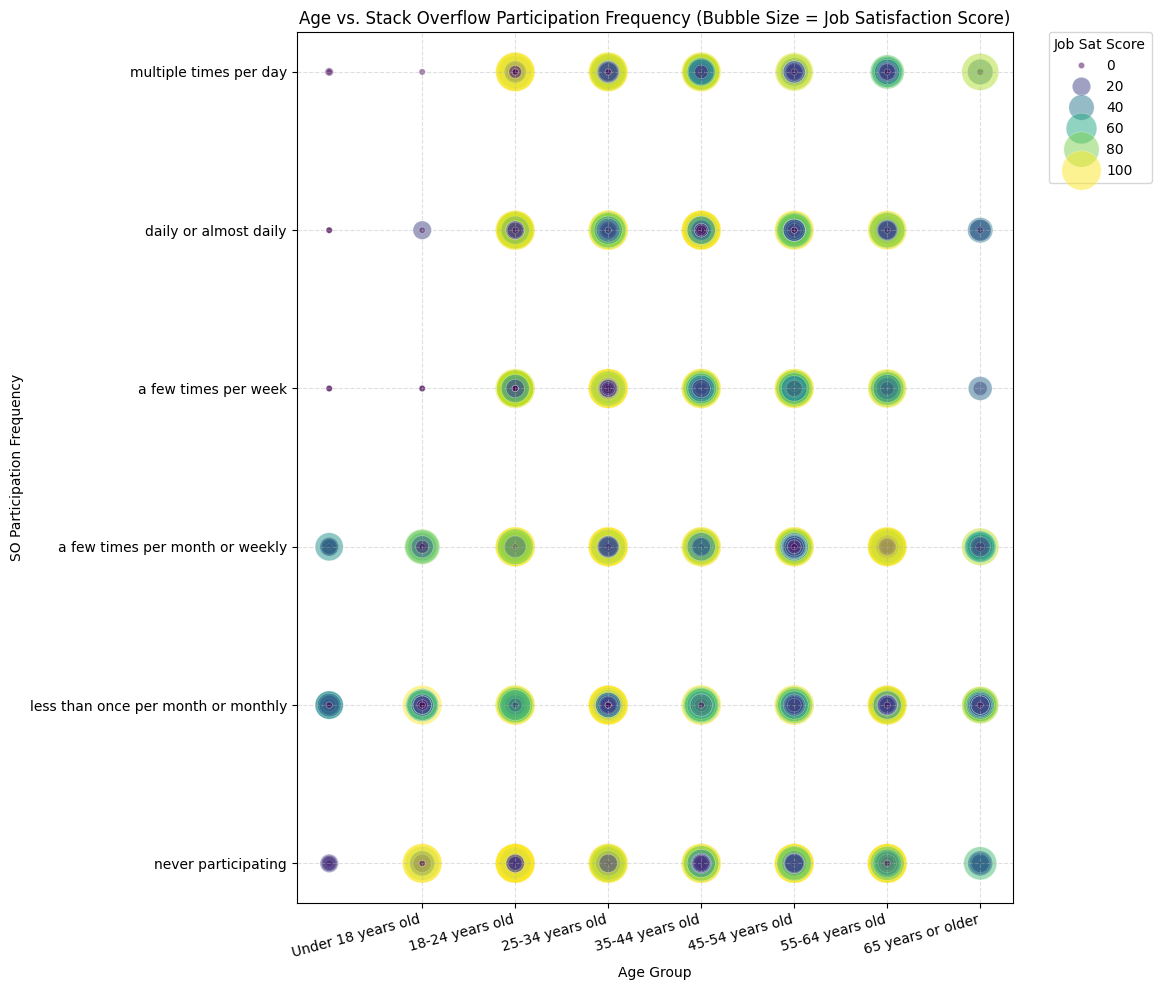

In [5]:
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# --- Bubble Plot: Age vs. SO Participation Frequency (Size=JobSatPoints_6) ---
print("\n--- Generating: Bubble Plot - Age vs. SO Participation (Size=JobSat) ---")

if 'Age' in df.columns and 'SOPartFreq' in df.columns and 'JobSatPoints_6' in df.columns:

    # 1. Prepare Data
    data_bubble_so = df[['Age', 'SOPartFreq', 'JobSatPoints_6']].copy()

    # Ensure JobSatPoints is numeric
    data_bubble_so['JobSatPoints_6'] = pd.to_numeric(data_bubble_so['JobSatPoints_6'], errors='coerce')

    # Clean SOPartFreq - convert to string, strip whitespace, handle NaNs/missing explicitly
    data_bubble_so['SOPartFreq'] = data_bubble_so['SOPartFreq'].astype(str).str.strip().str.lower()
    # --- FIX: Address FutureWarning for replace ---
    replace_map = {'na': np.nan, 'not sure/can\'t remember': np.nan,
                   'i have never participated in q&a on stack overflow': 'never participating'}
    data_bubble_so['SOPartFreq'] = data_bubble_so['SOPartFreq'].replace(replace_map)


    # Drop rows missing essential data for this plot AFTER cleaning SOPartFreq
    data_bubble_so.dropna(subset=['Age', 'SOPartFreq', 'JobSatPoints_6'], inplace=True)
    print(f"Using {len(data_bubble_so)} rows after dropping NAs for Age/SOPartFreq/JobSatPoints.")

    # 2. Define Order for SOPartFreq (adjust based on actual unique values)
    print("\nUnique SOPartFreq values found (lowercase) after cleaning:")
    # Make sure we only use unique values that are actually present after dropna
    present_freqs = data_bubble_so['SOPartFreq'].unique()
    print(present_freqs)

    # --- Define the desired logical order ---
    so_part_freq_order = [
        'never participating',
        'less than once per month or monthly',
        'a few times per month or weekly',
        'a few times per week',
        'daily or almost daily',
        'multiple times per day'
    ]
    # Filter data to only include frequencies we've defined an order for AND are present
    valid_freqs = [f for f in so_part_freq_order if f in present_freqs]
    data_bubble_so = data_bubble_so[data_bubble_so['SOPartFreq'].isin(valid_freqs)]
    # Update the order to only include present & valid frequencies for Categorical
    so_part_freq_order_filtered = [f for f in so_part_freq_order if f in valid_freqs]
    print(f"\nUsing {len(data_bubble_so)} rows after filtering for ordered SOPartFreq categories.")
    print(f"Order being used for SOPartFreq axis: {so_part_freq_order_filtered}")


    # 3. Convert Categorical Columns to Ordered Categorical Type and Get Codes
    # Age
    data_bubble_so['Age'] = pd.Categorical(data_bubble_so['Age'], categories=age_order, ordered=True)
    data_bubble_so['Age_Code'] = data_bubble_so['Age'].cat.codes

    # SOPartFreq - Use the filtered order
    data_bubble_so['SOPartFreq'] = pd.Categorical(data_bubble_so['SOPartFreq'], categories=so_part_freq_order_filtered, ordered=True)
    data_bubble_so['SOPartFreq_Code'] = data_bubble_so['SOPartFreq'].cat.codes

    # Check if data remains after filtering and categorization
    if data_bubble_so.empty:
        print("Error: No data remaining after filtering for Age and SOPartFreq categories. Cannot generate plot.")
    else:
        # 4. Create the Bubble Plot using Scatterplot
        plt.figure(figsize=(14, 10)) # Adjusted size for clarity
        bubble_plot = sns.scatterplot(
            data=data_bubble_so,
            x='Age_Code',           # Use numeric code for x-position
            y='SOPartFreq_Code',    # Use numeric code for y-position
            size='JobSatPoints_6',  # Bubble size represents Job Satisfaction score
            hue='JobSatPoints_6',   # Optional: Color bubbles by Job Satisfaction score too
            palette='viridis',      # Colormap for hue (e.g., viridis, plasma, coolwarm)
            sizes=(20, 800),        # Range of bubble sizes
            alpha=0.5               # Transparency for overlap
        )

        # 5. Customize Axes Ticks and Labels
        # X-axis (Age) - Use the original full age_order for labels
        plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=15, ha='right')
        # Y-axis (SOPartFreq) - Use the filtered order used for categorization
        plt.yticks(ticks=range(len(so_part_freq_order_filtered)), labels=so_part_freq_order_filtered)

        # 6. Add Titles and Grid
        plt.title('Age vs. Stack Overflow Participation Frequency (Bubble Size = Job Satisfaction Score)')
        plt.xlabel('Age Group')
        plt.ylabel('SO Participation Frequency')
        plt.grid(True, linestyle='--', alpha=0.4)

        # 7. Handle Legend (can be complex with both size and hue)
        # Position legend outside
        plt.legend(title="Job Sat Score", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        # You might need further customization if the default legend is too cluttered

        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
        plt.show()

else:
    print("Bubble plot skipped: Required columns 'Age', 'SOPartFreq', or 'JobSatPoints_6' not found.")

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.



--- Generating: Bubble Plot - Comp vs. Satisfaction (Size=Age) ---
Using 16185 rows after dropping NAs for Comp/Sat/Age.
Using 16177 rows after filtering for valid age groups.
Created 'AgeNumeric' column using category codes for bubble sizing.
Filtered out 254 rows with compensation > $300,000


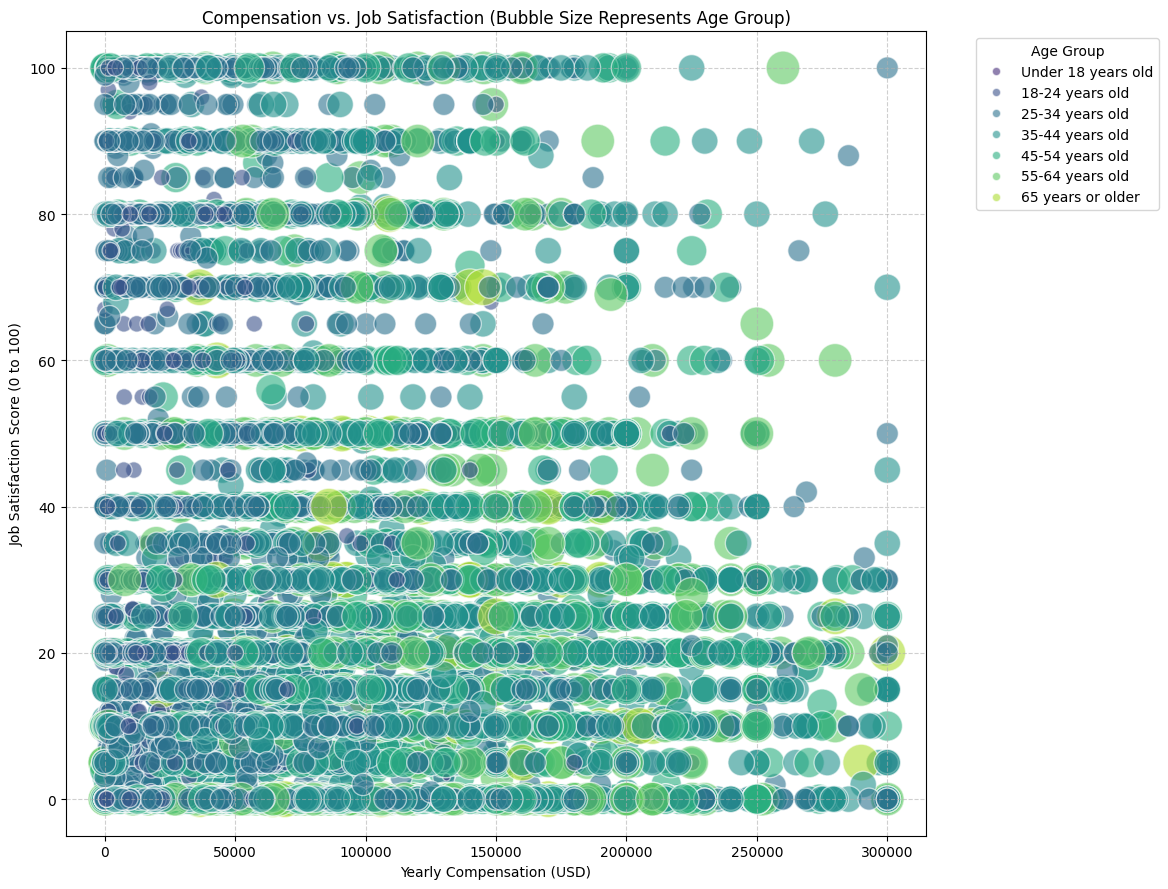

In [6]:
##Write your code here
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Define a compensation threshold for filtering (adjust as needed)
comp_threshold = 300000

# --- Bubble Plot: Compensation vs. Job Satisfaction (Size=Age) ---
print("\n--- Generating: Bubble Plot - Comp vs. Satisfaction (Size=Age) ---")

if 'ConvertedCompYearly' in df.columns and 'JobSatPoints_6' in df.columns and 'Age' in df.columns:
    # 1. Prepare data
    data_bubble_comp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].copy()

    # Ensure required columns are numeric (redundant if done globally, but safe)
    data_bubble_comp['ConvertedCompYearly'] = pd.to_numeric(data_bubble_comp['ConvertedCompYearly'], errors='coerce')
    data_bubble_comp['JobSatPoints_6'] = pd.to_numeric(data_bubble_comp['JobSatPoints_6'], errors='coerce')

    # Drop rows with missing values in essential columns for this plot
    data_bubble_comp.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'], inplace=True)
    print(f"Using {len(data_bubble_comp)} rows after dropping NAs for Comp/Sat/Age.")

    # 2. Filter valid age groups and set categorical type
    data_bubble_comp = data_bubble_comp[data_bubble_comp['Age'].isin(age_order)]
    data_bubble_comp['Age'] = pd.Categorical(data_bubble_comp['Age'], categories=age_order, ordered=True)
    print(f"Using {len(data_bubble_comp)} rows after filtering for valid age groups.")

    # 3. Create a numeric representation of Age for bubble size
    data_bubble_comp['AgeNumeric'] = data_bubble_comp['Age'].cat.codes
    print("Created 'AgeNumeric' column using category codes for bubble sizing.")

    # 4. Optionally filter out extreme compensation values
    rows_before_filter = len(data_bubble_comp)
    data_bubble_comp_filtered = data_bubble_comp[data_bubble_comp['ConvertedCompYearly'] <= comp_threshold].copy()
    rows_after_filter = len(data_bubble_comp_filtered)
    print(f"Filtered out {rows_before_filter - rows_after_filter} rows with compensation > ${comp_threshold:,}")

    # Check if data remains after filtering
    if data_bubble_comp_filtered.empty:
        print("Error: No data remaining after filtering. Cannot generate plot.")
    else:
        # 5. Create the bubble plot
        plt.figure(figsize=(14, 9))
        bubble_plot = sns.scatterplot(
            data=data_bubble_comp_filtered,
            x='ConvertedCompYearly',
            y='JobSatPoints_6',
            size='AgeNumeric',  # Size mapped to the numerical age code
            hue='Age',         # Color mapped to the categorical Age group
            sizes=(30, 700),   # Define the range of bubble sizes (min, max)
            alpha=0.6,         # Transparency for overlapping bubbles
            palette='viridis'  # Color palette suitable for ordered data
        )

        plt.title('Compensation vs. Job Satisfaction (Bubble Size Represents Age Group)')
        plt.xlabel('Yearly Compensation (USD)')
        plt.ylabel('Job Satisfaction Score (0 to 100)') # Using numeric score for axis
        plt.grid(True, linestyle='--', alpha=0.6)

        # 6. Customize the legend for clarity
        handles, labels = bubble_plot.get_legend_handles_labels()
        # Attempt to extract only the Age hue legend items
        try:
            hue_start_index = labels.index(age_order[0])
            hue_end_index = labels.index(age_order[-1]) + 1
            age_hue_handles = handles[hue_start_index:hue_end_index]
            age_hue_labels = labels[hue_start_index:hue_end_index]
            plt.legend(age_hue_handles, age_hue_labels, title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
        except (ValueError, IndexError): # Catch potential errors if labels don't match expected format
            print("Warning: Could not automatically parse legend for customization. Displaying default legend.")
            plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

        # 7. Adjust layout and show plot
        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
        plt.show()

else:
    print("Bubble plot skipped: Required columns 'ConvertedCompYearly', 'JobSatPoints_6', or 'Age' not found.")

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.




--- Generating: Bubble Plot - Language Popularity by Age ---
Processed 326344 respondent-language entries.
Found 350 unique Age-Language combinations with respondents.
Plotting 50 languages mentioned at least 100 times overall.
Using 350 data points (Age-Language pairs) for the plot.


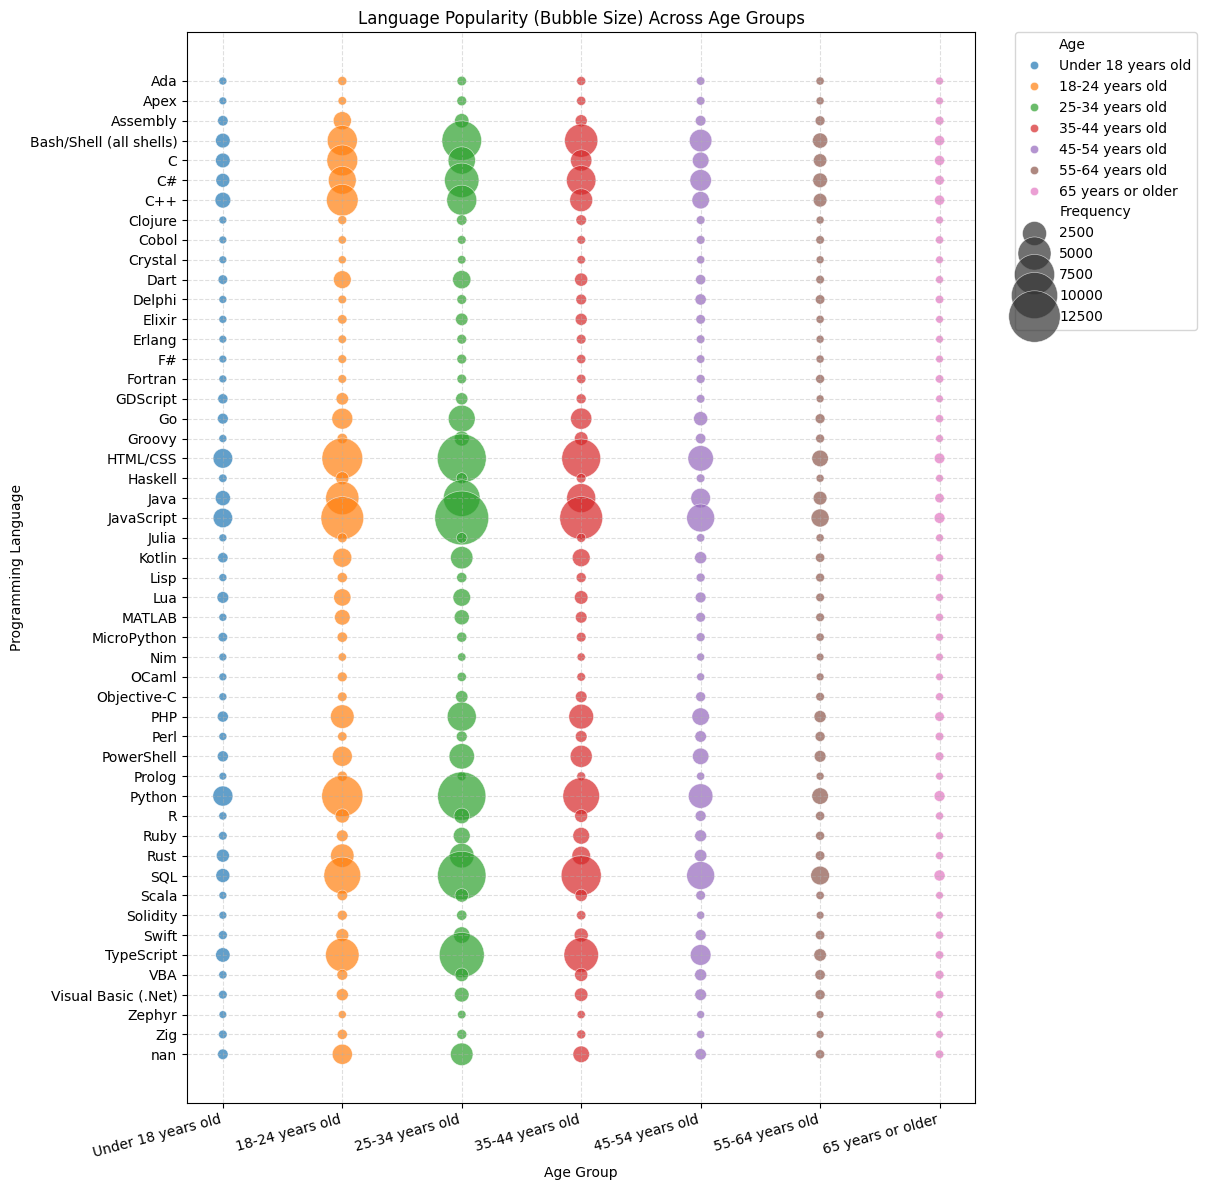

In [7]:
##Write your code here
# Define age order (if not already defined)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# --- Bubble Plot: Technology Preferences (Language Popularity) by Age ---
print("\n--- Generating: Bubble Plot - Language Popularity by Age ---")

if 'Age' in df.columns and 'LanguageHaveWorkedWith' in df.columns:

    # 1. Prepare Data
    data_lang_age = df[['Age', 'LanguageHaveWorkedWith']].copy()

    # Clean Age and filter valid groups
    data_lang_age = data_lang_age[data_lang_age['Age'].isin(age_order)]
    data_lang_age['Age'] = pd.Categorical(data_lang_age['Age'], categories=age_order, ordered=True)

    # Clean and Explode Languages
    data_lang_age['LanguageHaveWorkedWith'] = data_lang_age['LanguageHaveWorkedWith'].astype(str)
    data_lang_age.dropna(subset=['LanguageHaveWorkedWith'], inplace=True) # Drop rows where language is NaN *before* split
    lang_split = data_lang_age['LanguageHaveWorkedWith'].str.split(';')
    lang_exploded = data_lang_age.assign(Language=lang_split).explode('Language')
    lang_exploded['Language'] = lang_exploded['Language'].str.strip()
    lang_exploded = lang_exploded[lang_exploded['Language'] != ''] # Remove empty strings

    # Drop rows where Age is missing after potential earlier NaNs
    lang_exploded.dropna(subset=['Age'], inplace=True)
    print(f"Processed {len(lang_exploded)} respondent-language entries.")

    # 2. Calculate Frequency (Popularity) for each Age/Language combination
    age_lang_freq = lang_exploded.groupby(['Age', 'Language'], observed=False).size().reset_index(name='Frequency')
    # `observed=False` ensures all combinations (even with 0 freq) from categories are considered initially,
    # though size() will only return existing ones.

    print(f"Found {len(age_lang_freq)} unique Age-Language combinations with respondents.")

    # 3. Optional: Filter out less frequent languages overall for clarity
    min_total_freq_threshold = 100 # Keep languages mentioned at least this many times across all ages
    language_totals = age_lang_freq.groupby('Language')['Frequency'].sum()
    popular_languages = language_totals[language_totals >= min_total_freq_threshold].index.tolist()

    age_lang_freq_filtered = age_lang_freq[age_lang_freq['Language'].isin(popular_languages)].copy()
    print(f"Plotting {len(age_lang_freq_filtered['Language'].unique())} languages mentioned at least {min_total_freq_threshold} times overall.")
    print(f"Using {len(age_lang_freq_filtered)} data points (Age-Language pairs) for the plot.")


    # 4. Prepare for plotting: Get numeric codes for Age
    # Convert Age back to categorical *within the filtered dataframe* to get codes
    age_lang_freq_filtered['Age'] = pd.Categorical(age_lang_freq_filtered['Age'], categories=age_order, ordered=True)
    age_lang_freq_filtered['Age_Code'] = age_lang_freq_filtered['Age'].cat.codes

    # 5. Create the Bubble Plot
    # Since Language can have many unique values, sorting them might help y-axis readability
    # Sort languages potentially by total frequency for a more structured look
    sorted_languages = language_totals.loc[popular_languages].sort_values(ascending=False).index.tolist()

    plt.figure(figsize=(14, 12)) # Adjust size as needed, esp. height for languages
    bubble_plot = sns.scatterplot(
        data=age_lang_freq_filtered,
        x='Age_Code',          # Use numeric age code for x-axis position
        y='Language',          # Language names directly on y-axis
        size='Frequency',      # Bubble size represents frequency
        hue='Age',             # Color bubbles by Age group (optional reinforcement)
        palette='tab10',       # Color palette for Age groups
        sizes=(30, 1500),      # Range of bubble sizes (adjust max based on frequency range)
        alpha=0.7,             # Transparency
        # Use the sorted language list for the y-axis order if desired
        # y_order=sorted_languages # This doesn't directly work with scatterplot y, handled by sorting data/yticks
        legend='brief'         # Use a summarized legend
    )

    # 6. Customize Axes and Labels
    plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=15, ha='right')
    # Improve y-axis readability if many languages
    # plt.yticks(fontsize=8) # Reduce font size if needed

    plt.title('Language Popularity (Bubble Size) Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Programming Language')
    plt.grid(True, linestyle='--', alpha=0.4)

    # Position legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout for legend
    plt.show()

else:
    print("Bubble plot skipped: Required columns 'Age' or 'LanguageHaveWorkedWith' not found.")

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.



--- Generating: Bubble Plot - Preferred DB vs. Job Sat (Size=Popularity) ---
Processed 69816 respondent-database preference entries.
Plotting 35 databases preferred by at least 100 respondents.


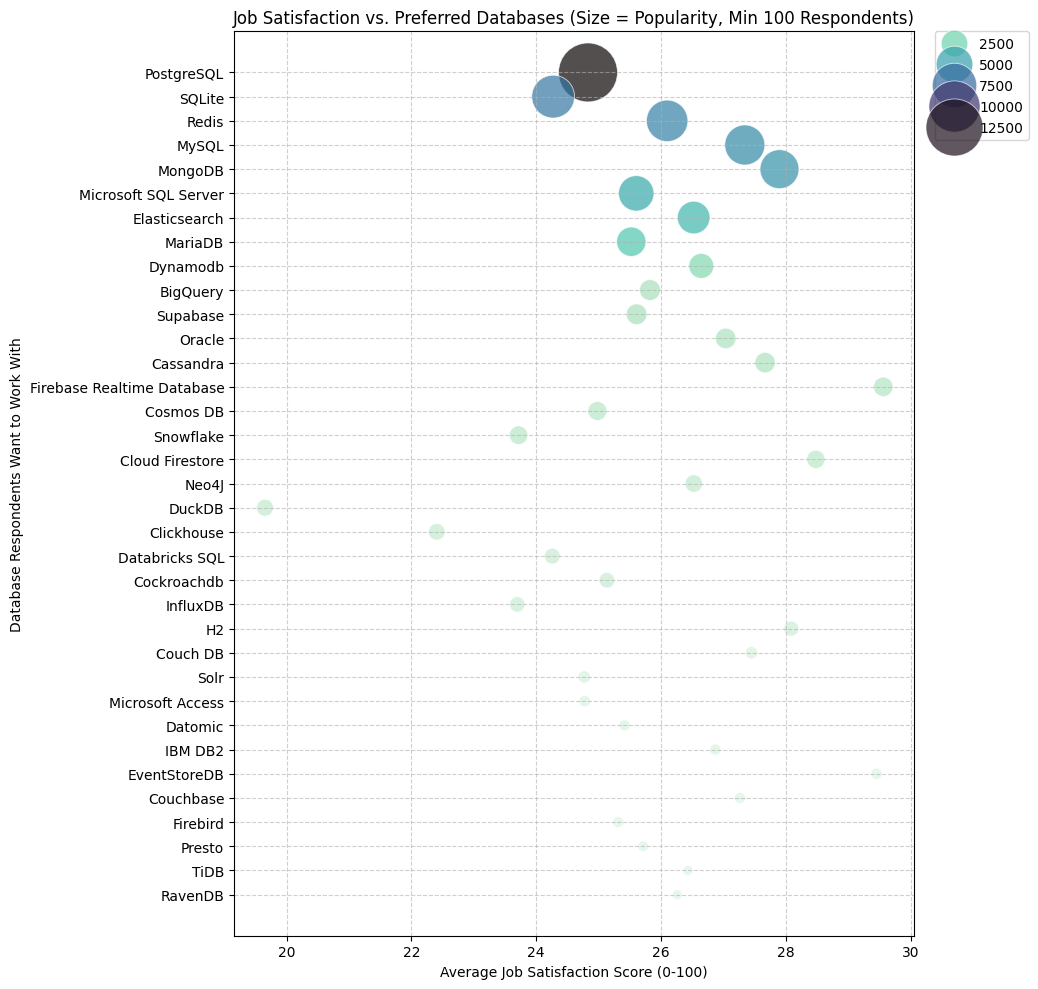

In [8]:
##Write your code here
# --- Bubble Plot: Preferred Databases vs. Job Satisfaction (Size=Popularity) ---
print("\n--- Generating: Bubble Plot - Preferred DB vs. Job Sat (Size=Popularity) ---")

if 'DatabaseWantToWorkWith' in df.columns and 'JobSatPoints_6' in df.columns:

    # 1. Prepare Data
    data_db_sat = df[['DatabaseWantToWorkWith', 'JobSatPoints_6']].copy()
    data_db_sat.dropna(inplace=True) # Drop rows missing satisfaction or DB preference

    # Ensure Database preference column is string type before splitting
    data_db_sat['DatabaseWantToWorkWith'] = data_db_sat['DatabaseWantToWorkWith'].astype(str)

    # 2. Explode the database preferences column
    db_split = data_db_sat['DatabaseWantToWorkWith'].str.split(';')
    db_exploded = data_db_sat.assign(Database=db_split).explode('Database')

    # Clean up database names (remove leading/trailing whitespace)
    db_exploded['Database'] = db_exploded['Database'].str.strip()
    # Filter out empty strings and potential 'nan' strings
    db_exploded = db_exploded[(db_exploded['Database'] != '') & (db_exploded['Database'].str.lower() != 'nan')]
    print(f"Processed {len(db_exploded)} respondent-database preference entries.")


    # 3. Aggregate Data: Calculate Avg Satisfaction and Count (Popularity) per Database
    db_stats = db_exploded.groupby('Database')['JobSatPoints_6'].agg(
        AvgSatisfaction='mean',
        RespondentCount='count' # This count will be the bubble size
    ).reset_index()


    # 4. Filter for Databases with minimum respondent count for clarity
    min_respondents_threshold = 100 # Adjust as needed
    db_stats_filtered = db_stats[db_stats['RespondentCount'] >= min_respondents_threshold].copy()
    db_stats_filtered.sort_values(by='RespondentCount', ascending=False, inplace=True) # Sort for potential y-axis order
    print(f"Plotting {len(db_stats_filtered)} databases preferred by at least {min_respondents_threshold} respondents.")


    # 5. Create the Bubble Plot
    plt.figure(figsize=(12, 10)) # Adjust figsize for potentially many databases
    bubble_plot = sns.scatterplot(
        data=db_stats_filtered,
        x='AvgSatisfaction',     # Average satisfaction on x-axis
        y='Database',            # Database name on y-axis
        size='RespondentCount',  # Bubble size indicates popularity (respondent count)
        hue='RespondentCount',   # Optional: Color also indicates popularity
        palette='mako_r',        # Example palette (reversed mako)
        sizes=(50, 1800),        # Range of bubble sizes
        alpha=0.7,
        legend='brief'           # Try a brief legend for size/hue
    )


    # 6. Customize Plot
    plt.title(f'Job Satisfaction vs. Preferred Databases (Size = Popularity, Min {min_respondents_threshold} Respondents)')
    plt.xlabel('Average Job Satisfaction Score (0-100)')
    plt.ylabel('Database Respondents Want to Work With')
    plt.grid(True, linestyle='--', alpha=0.6)
    # Adjust y-axis tick label size if too crowded
    # plt.yticks(fontsize=9)

    # Position legend
    plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout for legend
    plt.show()

else:
    print("Bubble plot skipped: Required columns 'DatabaseWantToWorkWith' or 'JobSatPoints_6' not found.")

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.



--- Generating: Bubble Plot - Comp by Dev Role (Size=JobSat) ---
Using 16169 respondent rows after dropping NAs for DevType/Comp/Sat.
Exploded into 16169 respondent-role entries.
Filtered out 254 entries with compensation > $300,000.

Filtering data to include only the top 15 most frequent roles: 
['Developer, full-stack', 'Developer, back-end', 'Developer, front-end', 'Developer, desktop or enterprise applications', 'Developer, mobile', 'Developer, embedded applications or devices', 'Other (please specify):', 'Engineering manager', 'Data engineer', 'DevOps specialist', 'Data scientist or machine learning specialist', 'Research & Development role', 'Academic researcher', 'Cloud infrastructure engineer', 'Senior Executive (C-Suite, VP, etc.)']
Using 14555 data points (respondent-role pairs) for the plot.


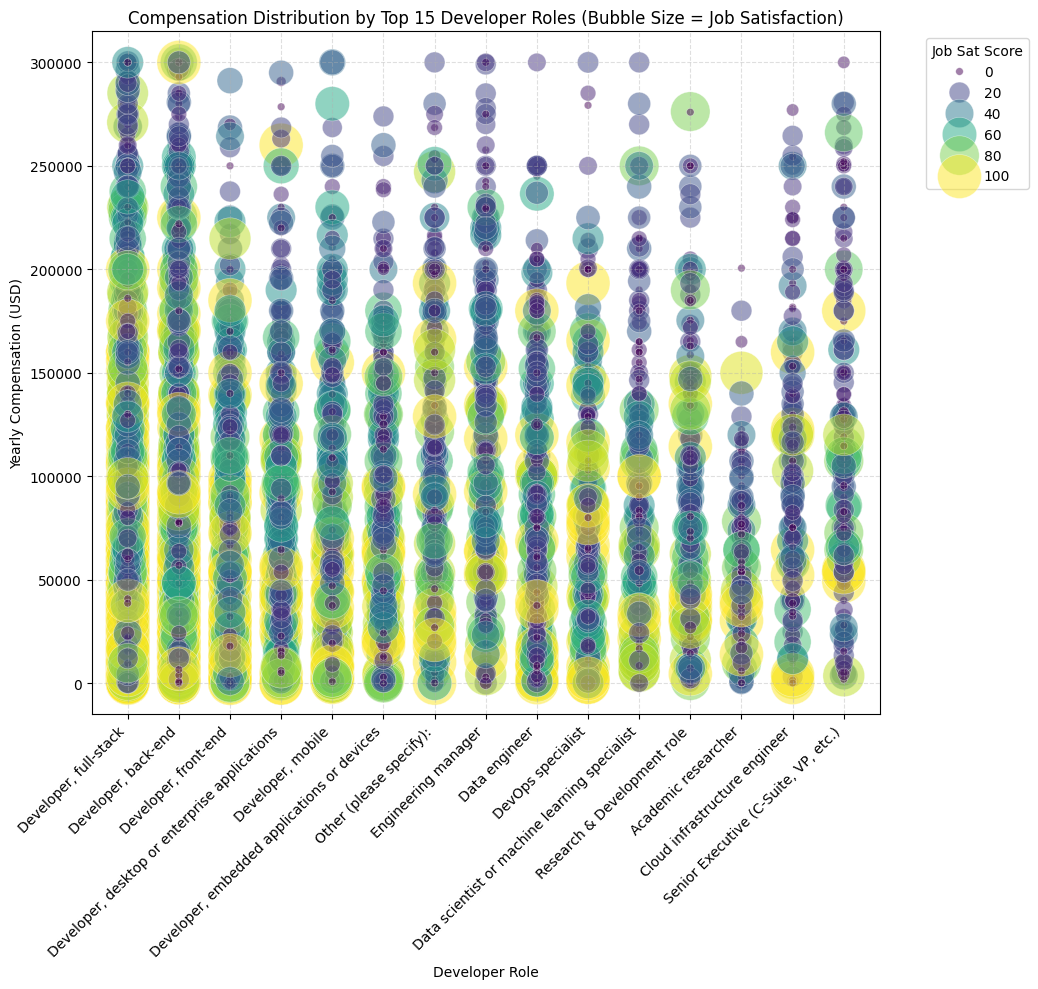

In [9]:
##Write your code here
# Define a compensation threshold for filtering (reuse if defined earlier)
comp_threshold = 300000

# --- Bubble Plot: Compensation Across Developer Roles (Size=JobSatPoints_6) ---
print("\n--- Generating: Bubble Plot - Comp by Dev Role (Size=JobSat) ---")

if 'DevType' in df.columns and 'ConvertedCompYearly' in df.columns and 'JobSatPoints_6' in df.columns:

    # 1. Prepare Data
    data_dev_comp_sat = df[['DevType', 'ConvertedCompYearly', 'JobSatPoints_6']].copy()

    # Clean DevType - convert to string, strip whitespace, handle NaNs/missing explicitly
    data_dev_comp_sat['DevType'] = data_dev_comp_sat['DevType'].astype(str).str.strip()
    # Replace potential 'nan' strings if they weren't actual NaNs before astype(str)
    data_dev_comp_sat = data_dev_comp_sat[data_dev_comp_sat['DevType'].str.lower() != 'nan']

    # Ensure numeric columns are appropriate type (redundant but safe)
    data_dev_comp_sat['ConvertedCompYearly'] = pd.to_numeric(data_dev_comp_sat['ConvertedCompYearly'], errors='coerce')
    data_dev_comp_sat['JobSatPoints_6'] = pd.to_numeric(data_dev_comp_sat['JobSatPoints_6'], errors='coerce')

    # Drop rows missing essential data AFTER cleaning DevType
    data_dev_comp_sat.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSatPoints_6'], inplace=True)
    print(f"Using {len(data_dev_comp_sat)} respondent rows after dropping NAs for DevType/Comp/Sat.")

    # 2. Explode the DevType column for multi-role respondents
    dev_split = data_dev_comp_sat['DevType'].str.split(';')
    dev_exploded = data_dev_comp_sat.assign(SingleDevType=dev_split).explode('SingleDevType')
    dev_exploded['SingleDevType'] = dev_exploded['SingleDevType'].str.strip()
    dev_exploded = dev_exploded[dev_exploded['SingleDevType'] != ''] # Remove empty strings
    print(f"Exploded into {len(dev_exploded)} respondent-role entries.")


    # 3. Filter Compensation Outliers
    rows_before_comp_filter = len(dev_exploded)
    dev_exploded_filtered = dev_exploded[dev_exploded['ConvertedCompYearly'] <= comp_threshold].copy()
    rows_after_comp_filter = len(dev_exploded_filtered)
    print(f"Filtered out {rows_before_comp_filter - rows_after_comp_filter} entries with compensation > ${comp_threshold:,}.")

    # 4. Filter to Top N Developer Roles for Clarity
    top_n_roles = 15 # Adjust N based on desired clarity vs. completeness
    role_counts = dev_exploded_filtered['SingleDevType'].value_counts()
    top_roles_list = role_counts.nlargest(top_n_roles).index.tolist()

    print(f"\nFiltering data to include only the top {top_n_roles} most frequent roles: ")
    print(top_roles_list)
    dev_filtered_final = dev_exploded_filtered[dev_exploded_filtered['SingleDevType'].isin(top_roles_list)].copy()

    # Re-categorize the filtered roles based on the filtered data's frequency for better axis order
    # Or use a predefined logical order if desired
    final_role_order = dev_filtered_final['SingleDevType'].value_counts().index.tolist() # Order by frequency
    dev_filtered_final['SingleDevTypeCat'] = pd.Categorical(
        dev_filtered_final['SingleDevType'],
        categories=final_role_order,
        ordered=True
    )
    print(f"Using {len(dev_filtered_final)} data points (respondent-role pairs) for the plot.")

    # 5. Create the Bubble Plot
    plt.figure(figsize=(12, 10)) # Adjust size, especially height for roles
    bubble_plot = sns.scatterplot(
        data=dev_filtered_final,
        x='SingleDevTypeCat',    # Categorical role on x-axis
        y='ConvertedCompYearly', # Compensation on y-axis
        size='JobSatPoints_6',   # Bubble size = Job Satisfaction Score
        hue='JobSatPoints_6',    # Optional: Color = Job Satisfaction Score
        palette='viridis',       # Colormap (e.g., viridis, plasma, coolwarm)
        sizes=(30, 1000),        # Range of bubble sizes
        alpha=0.5,               # Point transparency
        # Using stripplot style jittering implicitly via categorical x
    )

    # 6. Customize Axes and Labels
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.title(f'Compensation Distribution by Top {top_n_roles} Developer Roles (Bubble Size = Job Satisfaction)')
    plt.xlabel('Developer Role')
    plt.ylabel('Yearly Compensation (USD)')
    plt.grid(True, linestyle='--', alpha=0.4)

    # 7. Customize Legend
    plt.legend(title='Job Sat Score', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout for legend
    plt.show()

else:
    print("Bubble plot skipped: Required columns 'DevType', 'ConvertedCompYearly', or 'JobSatPoints_6' not found.")

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.



--- Generating: Bubble Plot - Collab Tool Usage Freq by Age ---
Processed 195412 respondent-tool usage entries.
Found 245 unique Age-Tool combinations with usage.
Plotting 35 tools mentioned at least 50 times overall.
Using 245 data points (Age-Tool pairs) for the plot.


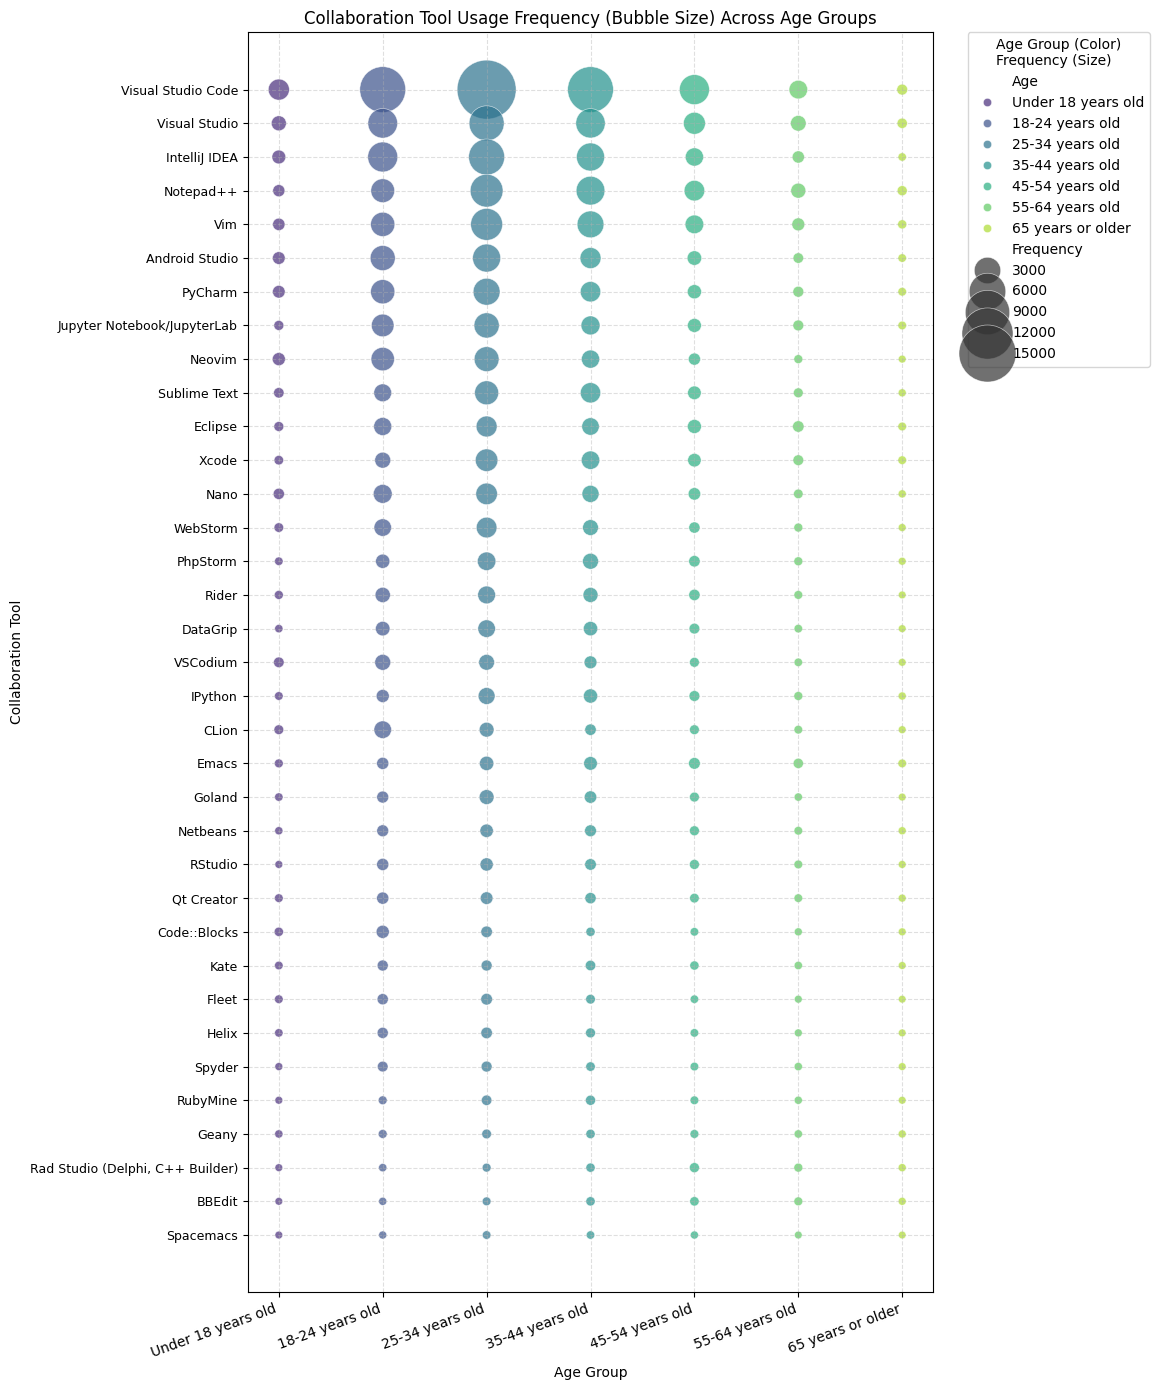

In [11]:
# Define age order (if not already defined)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# --- Bubble Plot: Collaboration Tools Usage Frequency by Age ---
print("\n--- Generating: Bubble Plot - Collab Tool Usage Freq by Age ---")

collab_tool_col = 'NEWCollabToolsHaveWorkedWith' # The column name from the dataset

if 'Age' in df.columns and collab_tool_col in df.columns:

    # 1. Prepare Data (Same as before)
    data_tool_age = df[['Age', collab_tool_col]].copy()
    data_tool_age = data_tool_age[data_tool_age['Age'].isin(age_order)]
    data_tool_age['Age'] = pd.Categorical(data_tool_age['Age'], categories=age_order, ordered=True)
    data_tool_age[collab_tool_col] = data_tool_age[collab_tool_col].astype(str)
    data_tool_age.dropna(subset=[collab_tool_col], inplace=True)
    tool_split = data_tool_age[collab_tool_col].str.split(';')
    tool_exploded = data_tool_age.assign(Tool=tool_split).explode('Tool')
    tool_exploded['Tool'] = tool_exploded['Tool'].str.strip()
    tool_exploded = tool_exploded[tool_exploded['Tool'] != '']
    tool_exploded = tool_exploded[tool_exploded['Tool'].str.lower() != 'nan']
    tool_exploded.dropna(subset=['Age'], inplace=True)
    print(f"Processed {len(tool_exploded)} respondent-tool usage entries.")

    # 2. Calculate Frequency (Same as before)
    age_tool_freq = tool_exploded.groupby(['Age', 'Tool'], observed=False).size().reset_index(name='Frequency')
    print(f"Found {len(age_tool_freq)} unique Age-Tool combinations with usage.")

    # 3. Filter Tools (Same as before)
    min_total_freq_threshold = 50
    tool_totals = age_tool_freq.groupby('Tool')['Frequency'].sum()
    popular_tools = tool_totals[tool_totals >= min_total_freq_threshold].index.tolist()
    age_tool_freq_filtered = age_tool_freq[age_tool_freq['Tool'].isin(popular_tools)].copy()
    print(f"Plotting {len(age_tool_freq_filtered['Tool'].unique())} tools mentioned at least {min_total_freq_threshold} times overall.")
    print(f"Using {len(age_tool_freq_filtered)} data points (Age-Tool pairs) for the plot.")

    # 4. Prepare for plotting: Get numeric codes for Age AND set Tool category order
    age_tool_freq_filtered['Age'] = pd.Categorical(age_tool_freq_filtered['Age'], categories=age_order, ordered=True)
    age_tool_freq_filtered['Age_Code'] = age_tool_freq_filtered['Age'].cat.codes

    # --- FIX: Define the order using CategoricalDtype ---
    sorted_tools = tool_totals.loc[popular_tools].sort_values(ascending=False).index.tolist()
    age_tool_freq_filtered['Tool'] = pd.Categorical(
        age_tool_freq_filtered['Tool'],
        categories=sorted_tools,
        ordered=True
    )
    # Sort the DataFrame based on the new categorical order for Tool
    # This helps ensure Seaborn respects the order visually
    age_tool_freq_filtered.sort_values(by='Tool', inplace=True)


    # Check if data remains
    if age_tool_freq_filtered.empty:
         print("Error: No data remaining after filtering. Cannot generate plot.")
    else:
        # 5. Create the Bubble Plot
        plt.figure(figsize=(14, len(sorted_tools) * 0.4)) # Adjust height based on number of tools
        bubble_plot = sns.scatterplot(
            data=age_tool_freq_filtered,
            x='Age_Code',          # Use numeric age code for x-axis position
            y='Tool',              # Tool names directly on y-axis (now ordered categorical)
            size='Frequency',      # Bubble size represents frequency
            hue='Age',             # Optional: Color bubbles by Age group
            palette='viridis',     # Example colormap
            sizes=(30, 1800),      # Range of bubble sizes (adjust max based on freq)
            alpha=0.7             # Transparency
            # --- FIX: Removed invalid 'order' argument ---
        )

        # 6. Customize Axes and Labels
        plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=20, ha='right')
        plt.yticks(fontsize=9) # Adjust y-tick font size if needed

        plt.title('Collaboration Tool Usage Frequency (Bubble Size) Across Age Groups')
        plt.xlabel('Age Group')
        plt.ylabel('Collaboration Tool')
        plt.grid(True, linestyle='--', alpha=0.4)

        # Position legend outside
        plt.legend(title="Age Group (Color)\nFrequency (Size)", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
        plt.show()

else:
    print(f"Bubble plot skipped: Required columns 'Age' or '{collab_tool_col}' not found.")

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.




--- Generating: Bubble Plot - Preferred Web Framework vs. Job Sat (Size=Popularity) ---
Processed 71359 respondent-framework preference entries.
Plotting 36 frameworks preferred by at least 100 respondents.


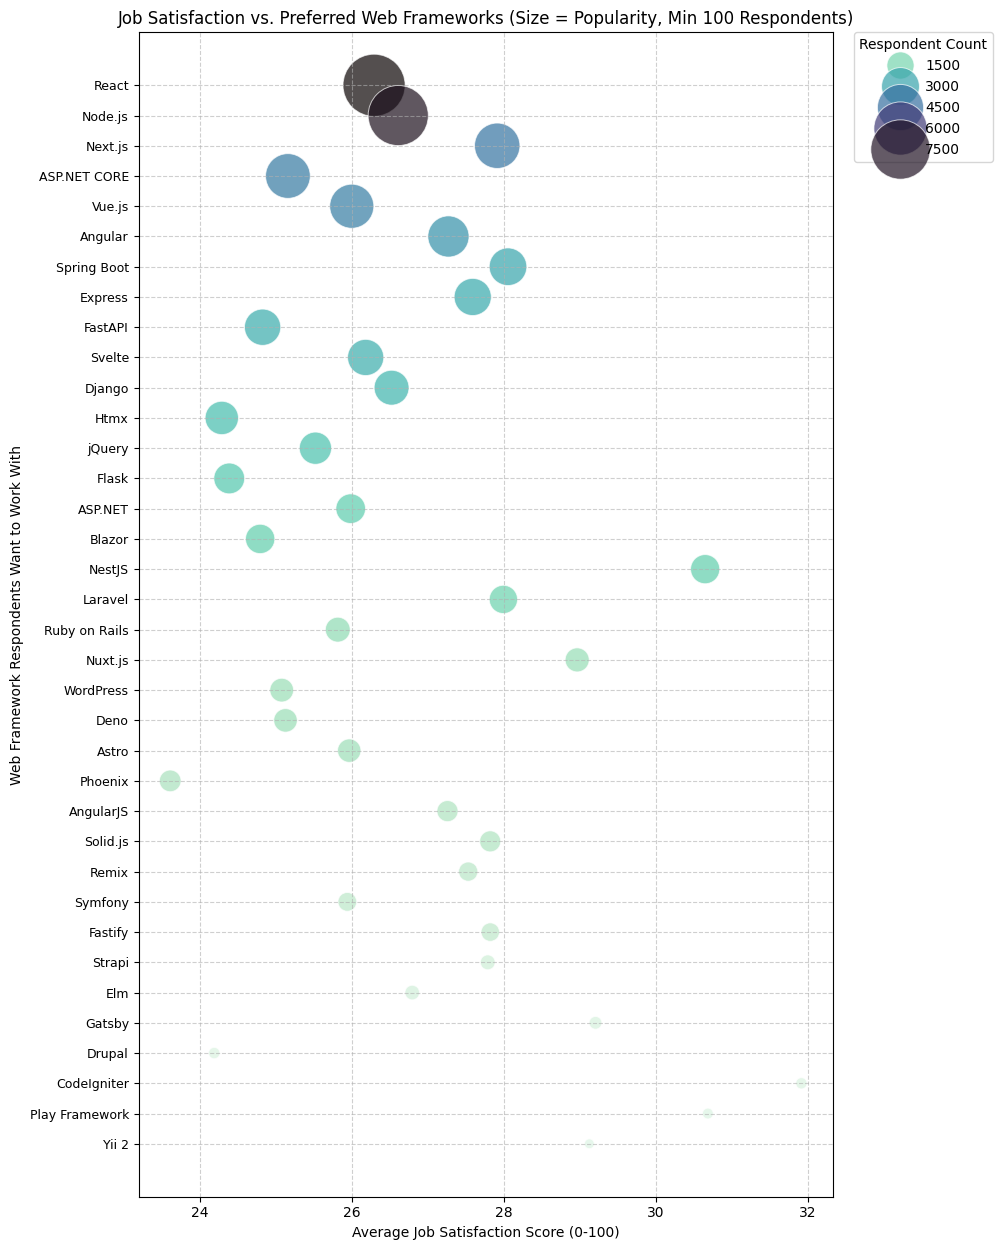

In [12]:
##Write your code here
# --- Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction (Size=Popularity) ---
print("\n--- Generating: Bubble Plot - Preferred Web Framework vs. Job Sat (Size=Popularity) ---")

framework_col = 'WebframeWantToWorkWith'
satisfaction_col = 'JobSatPoints_6'

if framework_col in df.columns and satisfaction_col in df.columns:

    # 1. Prepare Data
    data_fw_sat = df[[framework_col, satisfaction_col]].copy()

    # Ensure satisfaction is numeric (redundant but safe)
    data_fw_sat[satisfaction_col] = pd.to_numeric(data_fw_sat[satisfaction_col], errors='coerce')

    # Drop rows missing satisfaction or framework preference *before* splitting
    data_fw_sat.dropna(subset=[framework_col, satisfaction_col], inplace=True)

    # Ensure Framework preference column is string type before splitting
    data_fw_sat[framework_col] = data_fw_sat[framework_col].astype(str)


    # 2. Explode the framework preferences column
    fw_split = data_fw_sat[framework_col].str.split(';')
    fw_exploded = data_fw_sat.assign(Framework=fw_split).explode('Framework')

    # Clean up framework names (remove leading/trailing whitespace)
    fw_exploded['Framework'] = fw_exploded['Framework'].str.strip()
    # Filter out empty strings and potential 'nan' strings
    fw_exploded = fw_exploded[(fw_exploded['Framework'] != '') & (fw_exploded['Framework'].str.lower() != 'nan')]
    print(f"Processed {len(fw_exploded)} respondent-framework preference entries.")


    # 3. Aggregate Data: Calculate Avg Satisfaction and Count (Popularity) per Framework
    fw_stats = fw_exploded.groupby('Framework')[satisfaction_col].agg(
        AvgSatisfaction='mean',
        RespondentCount='count' # This count will be the bubble size
    ).reset_index()


    # 4. Filter for Frameworks with minimum respondent count for clarity
    min_respondents_threshold = 100 # Adjust as needed, start higher for web frameworks
    fw_stats_filtered = fw_stats[fw_stats['RespondentCount'] >= min_respondents_threshold].copy()

    # Sort frameworks for y-axis ordering (e.g., by popularity or name)
    # Sorting by RespondentCount (popularity) often makes sense
    sorted_frameworks = fw_stats_filtered.sort_values('RespondentCount', ascending=False)['Framework'].tolist()
    print(f"Plotting {len(fw_stats_filtered)} frameworks preferred by at least {min_respondents_threshold} respondents.")

    # 5. Set Categorical Order for y-axis plotting
    fw_stats_filtered['Framework'] = pd.Categorical(
        fw_stats_filtered['Framework'],
        categories=sorted_frameworks,
        ordered=True
    )
    # Ensure the dataframe is sorted according to the categorical order for plotting
    fw_stats_filtered.sort_values(by='Framework', inplace=True)


    # Check if data remains after filtering
    if fw_stats_filtered.empty:
        print("Error: No data remaining after filtering. Cannot generate plot.")
    else:
        # 6. Create the Bubble Plot
        # Dynamically adjust height based on the number of frameworks being plotted
        plot_height = max(8, len(sorted_frameworks) * 0.35)
        plt.figure(figsize=(12, plot_height))

        bubble_plot = sns.scatterplot(
            data=fw_stats_filtered,
            x='AvgSatisfaction',     # Average satisfaction on x-axis
            y='Framework',           # Framework name on y-axis (ordered categorical)
            size='RespondentCount',  # Bubble size indicates popularity
            hue='RespondentCount',   # Optional: Color also indicates popularity
            palette='mako_r',        # Example palette (reversed mako shows higher counts darker)
            sizes=(50, 2000),        # Range of bubble sizes (adjust max based on counts)
            alpha=0.7,
            legend='brief'           # Use a brief legend for size/hue scale
        )


        # 7. Customize Plot
        plt.title(f'Job Satisfaction vs. Preferred Web Frameworks (Size = Popularity, Min {min_respondents_threshold} Respondents)')
        plt.xlabel('Average Job Satisfaction Score (0-100)')
        plt.ylabel('Web Framework Respondents Want to Work With')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.yticks(fontsize=9) # Adjust font size if many frameworks

        # Position legend
        plt.legend(title="Respondent Count", bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
        plt.show()

else:
    print(f"Bubble plot skipped: Required columns '{framework_col}' or '{satisfaction_col}' not found.")

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.




--- Generating: Bubble Plot - Admired Langs Across Countries (Size=Freq) ---
Processed 183777 respondent-admired_language entries.
Found 4587 unique Country-AdmiredLanguage combinations.

Filtered to Top 10 Countries based on admiration frequency: ['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'France', 'Canada', 'Ukraine', 'Netherlands', 'Poland', 'Brazil']
Further filtered to Top 20 Languages within those countries.
Plotting 200 data points (Country-Language pairs).


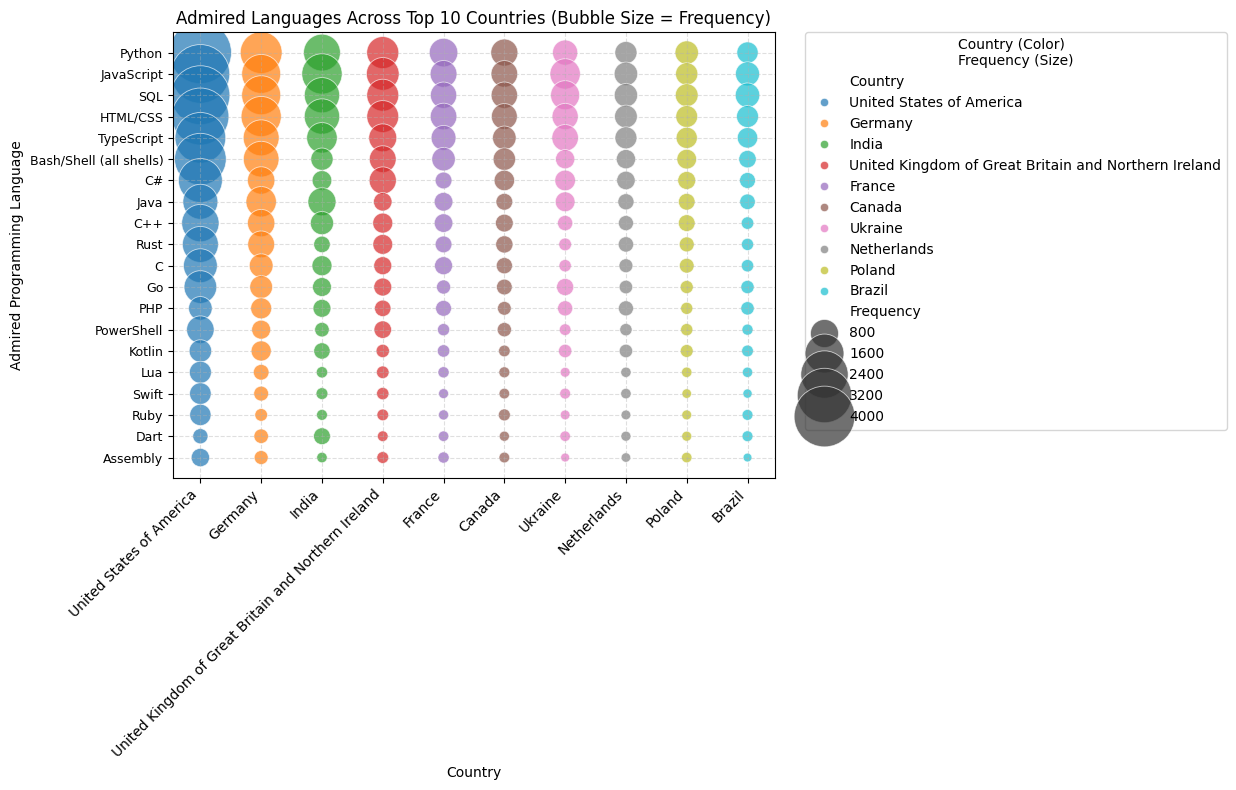


Note: For comparing many countries/languages, using sns.relplot with 
col='Country' or row='Language' (or both) might be clearer.


In [13]:
##Write your code here
# --- Bubble Plot: Admired Technologies Across Countries (Size=Frequency) ---
print("\n--- Generating: Bubble Plot - Admired Langs Across Countries (Size=Freq) ---")

admired_lang_col = 'LanguageAdmired'
country_col = 'Country'

if country_col in df.columns and admired_lang_col in df.columns:

    # 1. Prepare Data
    data_adm_lang_country = df[[country_col, admired_lang_col]].copy()

    # Clean Country names (redundant if done globally, but safe)
    data_adm_lang_country[country_col] = data_adm_lang_country[country_col].astype(str).str.strip()
    data_adm_lang_country = data_adm_lang_country[data_adm_lang_country[country_col].str.lower() != 'nan']


    # Clean and Explode Admired Languages
    data_adm_lang_country.dropna(subset=[admired_lang_col], inplace=True) # Drop if admired list is NaN
    data_adm_lang_country[admired_lang_col] = data_adm_lang_country[admired_lang_col].astype(str)

    lang_split = data_adm_lang_country[admired_lang_col].str.split(';')
    lang_exploded = data_adm_lang_country.assign(AdmiredLanguage=lang_split).explode('AdmiredLanguage')
    lang_exploded['AdmiredLanguage'] = lang_exploded['AdmiredLanguage'].str.strip()
    # Filter out empty strings and potential 'nan' strings
    lang_exploded = lang_exploded[(lang_exploded['AdmiredLanguage'] != '') & (lang_exploded['AdmiredLanguage'].str.lower() != 'nan')]

    # Drop rows where Country might be missing after processing
    lang_exploded.dropna(subset=[country_col], inplace=True)
    print(f"Processed {len(lang_exploded)} respondent-admired_language entries.")

    # 2. Calculate Frequency (Count) for each Country/LanguageAdmired combination
    country_lang_freq = lang_exploded.groupby([country_col, 'AdmiredLanguage']).size().reset_index(name='Frequency')
    print(f"Found {len(country_lang_freq)} unique Country-AdmiredLanguage combinations.")

    # 3. Filter for Clarity: Top N Countries AND Top M Admired Languages
    # Filter by Top N Countries first
    top_n_countries = 10 # Adjust as needed
    country_totals = country_lang_freq.groupby(country_col)['Frequency'].sum().nlargest(top_n_countries)
    top_countries_list = country_totals.index.tolist()
    country_lang_freq_filtered = country_lang_freq[country_lang_freq[country_col].isin(top_countries_list)].copy()
    print(f"\nFiltered to Top {top_n_countries} Countries based on admiration frequency: {top_countries_list}")

    # Filter by Top M Languages *within the selected countries*
    top_m_languages = 20 # Adjust as needed
    language_totals_in_top_countries = country_lang_freq_filtered.groupby('AdmiredLanguage')['Frequency'].sum().nlargest(top_m_languages)
    top_languages_list = language_totals_in_top_countries.index.tolist()
    country_lang_freq_filtered = country_lang_freq_filtered[country_lang_freq_filtered['AdmiredLanguage'].isin(top_languages_list)].copy()
    print(f"Further filtered to Top {top_m_languages} Languages within those countries.")
    print(f"Plotting {len(country_lang_freq_filtered)} data points (Country-Language pairs).")


    # 4. Prepare for Plotting: Set Categorical Orders
    # Country Order (e.g., by total frequency)
    sorted_countries = country_totals.index.tolist() # Already sorted by nlargest
    country_lang_freq_filtered[country_col] = pd.Categorical(
        country_lang_freq_filtered[country_col],
        categories=sorted_countries,
        ordered=True
    )

    # Language Order (e.g., by total frequency)
    sorted_languages = language_totals_in_top_countries.index.tolist() # Already sorted by nlargest
    country_lang_freq_filtered['AdmiredLanguage'] = pd.Categorical(
        country_lang_freq_filtered['AdmiredLanguage'],
        categories=sorted_languages,
        ordered=True
    )

    # Sort the data itself to help seaborn plotting
    country_lang_freq_filtered.sort_values(by=[country_col, 'AdmiredLanguage'], inplace=True)


    # Check if data remains
    if country_lang_freq_filtered.empty:
         print("Error: No data remaining after filtering. Cannot generate plot.")
    else:
        # 5. Create the Bubble Plot
        plot_height = max(8, len(top_languages_list) * 0.4) # Adjust height based on # languages
        plt.figure(figsize=(15, plot_height))

        bubble_plot = sns.scatterplot(
            data=country_lang_freq_filtered,
            x=country_col,         # Country on x-axis
            y='AdmiredLanguage',   # Admired Language on y-axis
            size='Frequency',      # Bubble size = Frequency of admiration
            hue=country_col,       # Color bubbles by country (reinforces x-axis)
            palette='tab10',       # Palette for countries
            sizes=(40, 2000),      # Range of bubble sizes (adjust max based on freq)
            alpha=0.7,
            legend='brief'         # Try a brief legend for size scale
        )

        # 6. Customize Plot
        plt.xticks(rotation=45, ha='right') # Rotate country names
        plt.yticks(fontsize=9) # Adjust language name font size if needed
        plt.title(f'Admired Languages Across Top {top_n_countries} Countries (Bubble Size = Frequency)')
        plt.xlabel('Country')
        plt.ylabel('Admired Programming Language')
        plt.grid(True, linestyle='--', alpha=0.4)

        # 7. Handle Legend
        # Get handles and labels
        handles, labels = bubble_plot.get_legend_handles_labels()
        # Separate size handles/labels from hue handles/labels if possible
        # This can be tricky; often easier to just let 'brief' handle it or manually create a legend
        # For simplicity, let's just position the auto-generated one
        plt.legend(title="Country (Color)\nFrequency (Size)", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
        plt.show()

        # --- Note on Alternative Visualization ---
        print("\nNote: For comparing many countries/languages, using sns.relplot with ")
        print("col='Country' or row='Language' (or both) might be clearer.")

else:
    print(f"Bubble plot skipped: Required columns '{country_col}' or '{admired_lang_col}' not found.")

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
